<a href="https://colab.research.google.com/github/djglab/Foxk1_manuscript/blob/main/notebooks/Figure_4g_Day_10_FOXK1_chromVAR_ATAC_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this notebook is to see the chromatin accessibilty for transcription factors comparing the Control and Foxk1 Null

In [ ]:
start_time0 <- Sys.time()

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)
system('apt-get install libcairo2-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following package was automatically installed and is no longer required:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [5] "  libnvidia-common-470"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
 [6] "Use 'apt autoremove' to remove it."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
 [7] "The following additional packages will be installed:"                                                                  

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following package was automatically installed and is no longer required:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [5] "  libnvidia-common-470"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
 [6] "Use 'apt autoremove' to remove it."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
 [7] "The following additional packages will be installed:"                                                                  

In [ ]:
install.packages(c('gsl', 'devtools'))
install.packages('Cairo')
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'chromVAR', 'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'BiocParallel', 'SummarizedExperiment', 'gplots', 'circlize', 'plyr', 'dplyr', 
  'DESeq2', 'VennDiagram', 'ggwordcloud', 'GenomicRanges', 'ggrepel'
))
devtools::install_github("GreenleafLab/chromVARmotifs")
devtools::install_github("jokergoo/ComplexHeatmap")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("gsl", "devtools")):
“installation of package ‘gsl’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'dplyr'”
Installing package(s) 'BiocVersion', 'chromVAR',
  'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'BiocParallel',
  'SummarizedExperiment', 'gplots', 'circlize', 'plyr', 'DESeq2',
  'VennDiagram', 'ggwordcloud', 'GenomicRanges'

also installing the dependencies ‘pracma’, ‘R.oo’, 

yaml       (2.2.2 -> 2.3.5) [CRAN]
crayon     (1.4.2 -> 1.5.0) [CRAN]
glue       (1.6.1 -> 1.6.2) [CRAN]
rlang      (1.0.1 -> 1.0.2) [CRAN]
colorspace (2.0-2 -> 2.0-3) [CRAN]
tidyselect (1.1.1 -> 1.1.2) [CRAN]
openssl    (1.4.6 -> 2.0.0) [CRAN]
jsonlite   (1.7.3 -> 1.8.0) [CRAN]
clipr      (0.7.1 -> 0.8.0) [CRAN]
cli        (3.1.1 -> 3.2.0) [CRAN]
withr      (2.4.3 -> 2.5.0) [CRAN]


Installing 11 packages: yaml, crayon, glue, rlang, colorspace, tidyselect, openssl, jsonlite, clipr, cli, withr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpeMk2ff/remotes40728f5c26/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




iterators  (NA -> 1.0.14) [CRAN]
foreach    (NA -> 1.5.2 ) [CRAN]
doParallel (NA -> 1.0.17) [CRAN]
clue       (NA -> 0.3-60) [CRAN]
GetoptLong (NA -> 1.0.5 ) [CRAN]


Installing 5 packages: iterators, foreach, doParallel, clue, GetoptLong

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpeMk2ff/remotes4050de46f1/jokergoo-ComplexHeatmap-267a221/DESCRIPTION’ ... OK
* preparing ‘ComplexHeatmap’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘ComplexHeatmap_2.11.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(chromVARmotifs)
library(chromVAR)
library(BSgenome.Mmusculus.UCSC.mm10)
library(motifmatchr)
library(BiocParallel)
library(SummarizedExperiment)
library(gplots)
library(circlize)
library(ComplexHeatmap)
register(MulticoreParam(4)) # Use 8 cores
library(plyr)
library(dplyr)
library(DESeq2)
library(VennDiagram)
library(ggwordcloud)
library(GenomicRanges)
library(ggrepel)



Loading required package: BSgenome

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: GenomicRanges

Loading required package: Biostrings

Loadin

In [ ]:
s3_bed_files <- c(
  'D10_Control_EBs_1_S1' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/1_D10_Control_EBs_1_S1_summits.bed',
  'D10_Control_EBs_2_S2' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/2_D10_Control_EBs_2_S2_summits.bed',
  'D10_Foxk1KO_EBs_1_S3' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/3_D10_Foxk1KO_EBs_1_S3_summits.bed',
  'D10_Foxk1KO_EBs_2_S4' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/4_D10_Foxk1KO_EBs_2_S4_summits.bed',
  'D10_Foxk1KO_IWR1_EBs_1_S5' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/5_D10_Foxk1KO_IWR1_EBs_1_S5_summits.bed',
  'D10_Foxk1KO_IWR1_EBs_2_S6' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/6_D10_Foxk1KO_IWR1_EBs_2_S6_summits.bed')


In [ ]:
peak_size <- 200L # the ATAC-seq peaks
window_size <- 800L
gr <- lapply(s3_bed_files, function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = peak_size)
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 2, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(width = window_size, fix = 'center')
  gr <- gr[!seqnames(gr) %in% c('chrM', 'chrY')]

In [ ]:
gr

GRanges object with 8018 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1     3671303-3672102      *
     [2]     chr1     4257880-4258679      *
     [3]     chr1     4785336-4786135      *
     [4]     chr1     4807413-4808212      *
     [5]     chr1     4857304-4858103      *
     ...      ...                 ...    ...
  [8014]     chrX 170810934-170811733      *
  [8015]     chrX 170811062-170811861      *
  [8016]     chrX 170843253-170844052      *
  [8017]     chrX 170843444-170844243      *
  [8018]     chrX 170880764-170881563      *
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [ ]:
s3_bw_files <- c(
  'D10_Control_EBs_1_S1' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/1_D10_Control_EBs_1_S1_treat_pileup.bw',
  'D10_Control_EBs_2_S2' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/2_D10_Control_EBs_2_S2_treat_pileup.bw',
  'D10_Foxk1KO_EBs_1_S3' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/3_D10_Foxk1KO_EBs_1_S3_treat_pileup.bw',
  'D10_Foxk1KO_EBs_2_S4' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/4_D10_Foxk1KO_EBs_2_S4_treat_pileup.bw')

In [ ]:
blacklist_file <- 'https://s3.msi.umn.edu/gongx030/datasets/datasets=blacklists_version=20190827a/mm10.blacklist.bed.gz'
blacklist <- blacklist_file %>%
  url() %>%
  gzcon() %>%
  readLines() %>%
  textConnection() %>%
  read.table(header = TRUE, sep = '\t')
blacklist <- GRanges(seqnames = blacklist[, 1], range = IRanges(blacklist[, 2], blacklist[, 3]))

gr <- gr[!gr %over% blacklist]
gr

GRanges object with 7922 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1     3671303-3672102      *
     [2]     chr1     4257880-4258679      *
     [3]     chr1     4785336-4786135      *
     [4]     chr1     4807413-4808212      *
     [5]     chr1     4857304-4858103      *
     ...      ...                 ...    ...
  [7918]     chrX 170810934-170811733      *
  [7919]     chrX 170811062-170811861      *
  [7920]     chrX 170843253-170844052      *
  [7921]     chrX 170843444-170844243      *
  [7922]     chrX 170880764-170881563      *
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [ ]:
library(rtracklayer)
library(futile.logger)
X <- do.call('cbind', lapply(s3_bw_files, function(bw_file){
  flog.info(sprintf('reading %s', bw_file))
	ga <- rtracklayer::import(bw_file, format = 'BigWig')#, which = reduce(peaks))	
  cvg <- coverage(ga, weight = as.numeric(mcols(ga)$score))
  sum(cvg[gr])
}))
se <- SummarizedExperiment(assays = SimpleList(counts = X), rowRanges = gr, colData = names(s3_bw_files))

INFO [2022-03-07 19:47:29] reading https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/1_D10_Control_EBs_1_S1_treat_pileup.bw
INFO [2022-03-07 19:49:18] reading https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/2_D10_Control_EBs_2_S2_treat_pileup.bw
INFO [2022-03-07 19:50:53] reading https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/3_D10_Foxk1KO_EBs_1_S3_treat_pileup.bw
INFO [2022-03-07 19:52:28] reading https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/4_D10_Foxk1KO_EBs_2_S4_treat_pileup.bw


In [ ]:
se <- addGCBias(se, genome = BSgenome.Mmusculus.UCSC.mm10)

In [ ]:
colData(se)$Control <- grepl('Control', names(s3_bw_files))
colData(se)$KO <- grepl('Foxk1KO_EBs', names(s3_bw_files))
colData(se)$Iwr1<- grepl('IWR1', names(s3_bw_files))

In [ ]:
colData(se)$condition <- t(apply(colData(se)[,c("Control","KO","Iwr1")], 1, function(i) names(colData(se)[,c("Control","KO","Iwr1")])[i]))

In [ ]:
motif_ix <- matchMotifs(mouse_pwms_v2, se, genome = BSgenome.Mmusculus.UCSC.mm10)

In [ ]:
dev <- computeDeviations(object = se, annotations = motif_ix)
v <- computeVariability(dev)

In [ ]:
m <- v$p_value_adj < 0.05
pc <- prcomp(assays(dev)$z[m, ])
eigs <- pc$sdev^2

In [ ]:
m <- v$p_value_adj < 0.05
cat(sprintf('# of significant motifs: %d(%d)\n', sum(m), length(m)))
Y <- assays(dev)$z
rownames(Y) <- rowData(dev)$name
Y <- Y[m, ]

# of significant motifs: 655(884)


In [ ]:
sig <- v[v$p_value_adj < 0.05,]

In [ ]:
term <- c('Nkx25','Nkx22','Klf4','Klf2','Klf3','Klf13','Hand1','Hand2','Hivep3','Hivep2','Hivep1','Mef2c','Mef2b','Gata1','Gata5','Hoxb1','Six3','Smad4','Mycn','Foxk1','Pitx2','Irx4','Sox4')


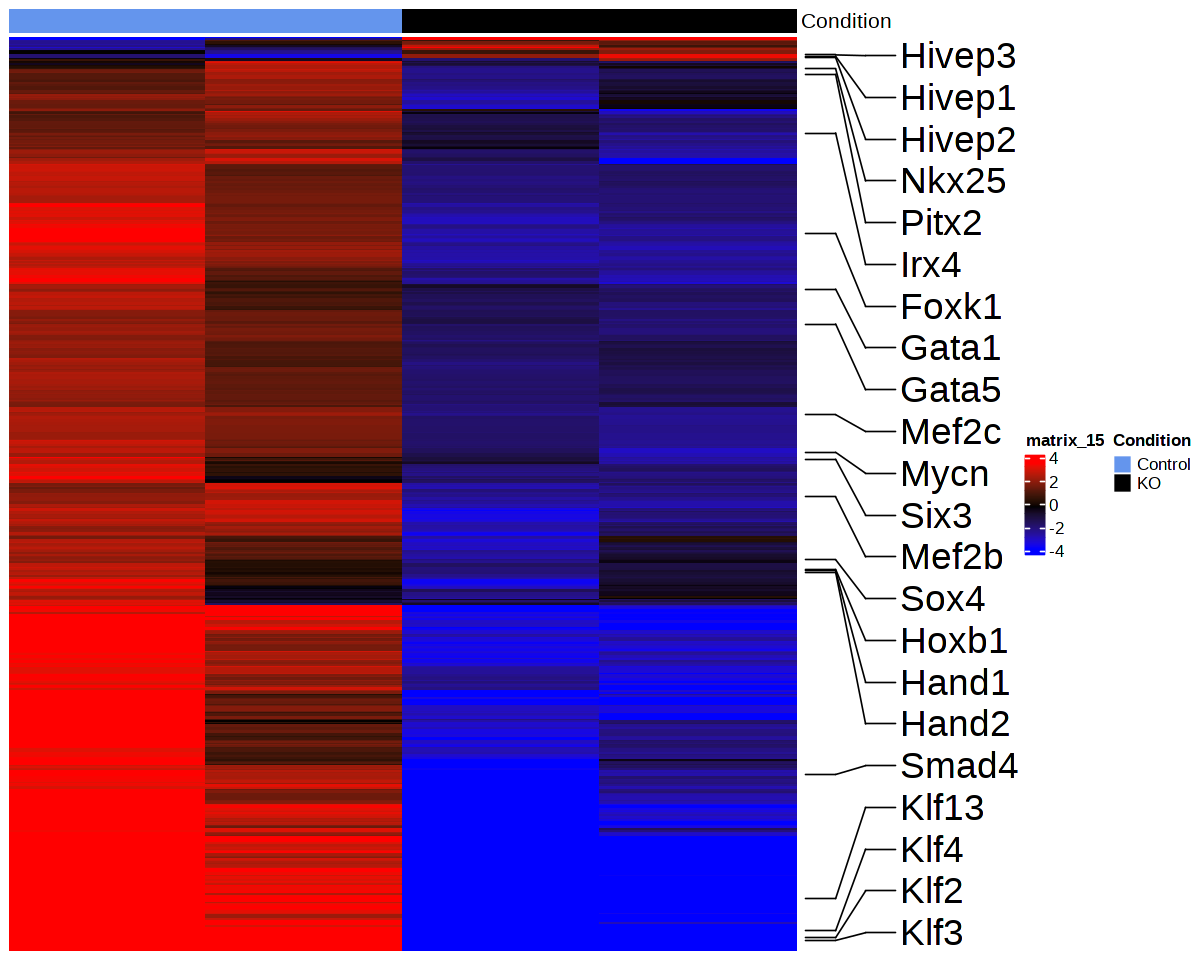

In [ ]:
column_annotation <- HeatmapAnnotation(
  Condition = colData(se)$condition,
  col = list(Condition = c("Control" = "cornflowerblue", "KO" = "black"))
)

col_fun <- colorRamp2(quantile(Y, c(0.1, 0.5, 0.9)), c("blue", "black", "red"))

options(repr.plot.width=10, repr.plot.height = 8)
Heatmap(
  Y,
  cluster_rows = TRUE,
  cluster_columns = FALSE,
  top_annotation = column_annotation,
  show_row_names = TRUE,
  show_column_names = FALSE,
  show_column_dend = FALSE,
  col = col_fun,
  show_row_dend = FALSE,
  row_names_gp = gpar(fontsize = 15)
)+
  rowAnnotation(
    mark = anno_mark(
      at = which(rownames(Y) %in% term), 
      labels = rownames(Y)[rownames(Y) %in% term], 
      labels_gp = gpar(fontsize = 22), 
      link_width = unit(20, "mm"),
      padding = unit(2, "mm"), 
      which = 'row'
    ) 
  )

In [ ]:
Sys.time() - start_time0

Time difference of 2.571454 hours

In [ ]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggrepel_0.9.1                      ggwordcloud_0.5.0                 
 [3] ggplot2_3.3.5                      VennDiagram_1.7.1                 
 [5] futile.logger_1.4.3                DESeq2_1.34.0                     
 [7] dplyr_1.0.8     